(unsupervised:density-clustering:dbscan)=
# DBSCAN

The DBSCAN (density-based spatial clustering of applications with noise) algorithm takes two parameters $\varepsilon>0$ and $N\in\mathbb{N}$, which together specify what a *core point* is: a point $x$ from the training data set is a core point if the ball of radius $\varepsilon$ centered at $x$ contains at least $N$ points of the data set (including $x$). We may say that core points are points with dense neighborhood.

In the context of DBSCAN a cluster is a subset $S$ of the data set with the following properties:
* $S$ contains at least one core point $\bar{x}_0$.
* For each point $x$ in $S$ there is a finite sequence of core points $\bar{x}_1,\ldots,\bar{x}_k$ such that $\bar{x}_l$ belongs to the $\varepsilon$-neighborhood of $\bar{x}_{l-1}$ for $l=1,\ldots,k$ and $x$ belongs to the $\varepsilon$-neighborhood of $\bar{x}_k$.

Each cluster contains core points and may contain non-core points (points with few neighbors). Non-core points can be regarded as the cluster's edge. From the sequence property above one immediately sees that each core point of a cluster may take the role of $\bar{x}_0$.

There may exist points which do not belong to any cluster. Such points are regarded as noise or outliers.

```{figure} points.svg
---
alt: different types of points
---
DBSCAN classifies points as core points, non-core points, and outliers.
```

DBSCAN starts with some point of the data set. If it's a non-core point, it is marked as visited and a new point is chosen. If it is a core point, a new cluster is started. All points from the $\varepsilon$-neighborhood are added to the cluster. Then all neighborhoods of core points in the starting point's neighborhood are added, and so on until there are no more reachable core points. Then a new unvisited point is chosen and the cluster discovery starts again from this new point (if it is a core point). If all points have been visited, the points not assigned to a cluster are interpreted as outliers.

The computationally expensive part is to find all points in the $\varepsilon$-neighborhood of a given point. There exist efficient implementations for such *range queries* for data sets stored in well structured data bases.

A major advantage of DBSCAN is that we do not have to estimate the number of clusters in advance. Also results do not depend on (random) initializations. Although assignment of non-core points to clusters depends on the processing order of the points, clustering of core points is always the same.

Parameters $\varepsilon$ and $N$ may be hard to choose. But they have a clear interpretation. The smaller $\varepsilon$ and the higher $N$ the closer points have to be to form a cluster. Domain knowledge may help to choose these parameters. Another drawback is that there is only one set of parameters for all clusters. Consequently all clusters should show comparable density.

## DBSCAN with Scikit-Learn

Scikit-Learn provides a [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) class in its `cluster` module. Relevant parameters are `eps` (our $\varepsilon$) and `min_samples` (our $N$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.cluster as cluster

rng = np.random.default_rng(0)

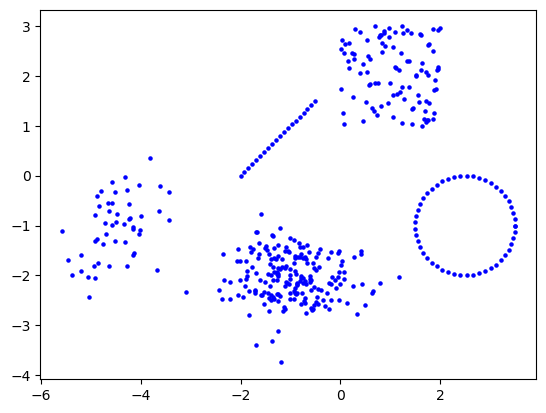

In [2]:
# 5 clusters in 2 dimensions

n1, n2, n3, n4, n5 = 100, 200, 20, 50, 50
n = n1 + n2 + n3 + n4 + n5

X1 = rng.uniform((0, 1), (2, 3), (n1, 2))
X2 = rng.multivariate_normal((-1, -2), ((0.5, 0), (0, 0.2)), n2)
X3 = np.linspace(-1, 0.5, n3).reshape(-1, 1) * np.ones((1, 2)) + np.array([[-1, 1]])
X4 = rng.multivariate_normal((-4.5, -1), ((0.2, 0.1), (0.1, 0.4)), n4)
phi = np.linspace(0, 2 * np.pi, n5).reshape(-1, 1)
X5 = np.array([[2.5, -1]]) + np.concatenate((np.cos(phi), np.sin(phi)), axis=1)

X = np.concatenate((X1, X2, X3, X4, X5))

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=5, c='b')
ax.axis('equal')
plt.show()

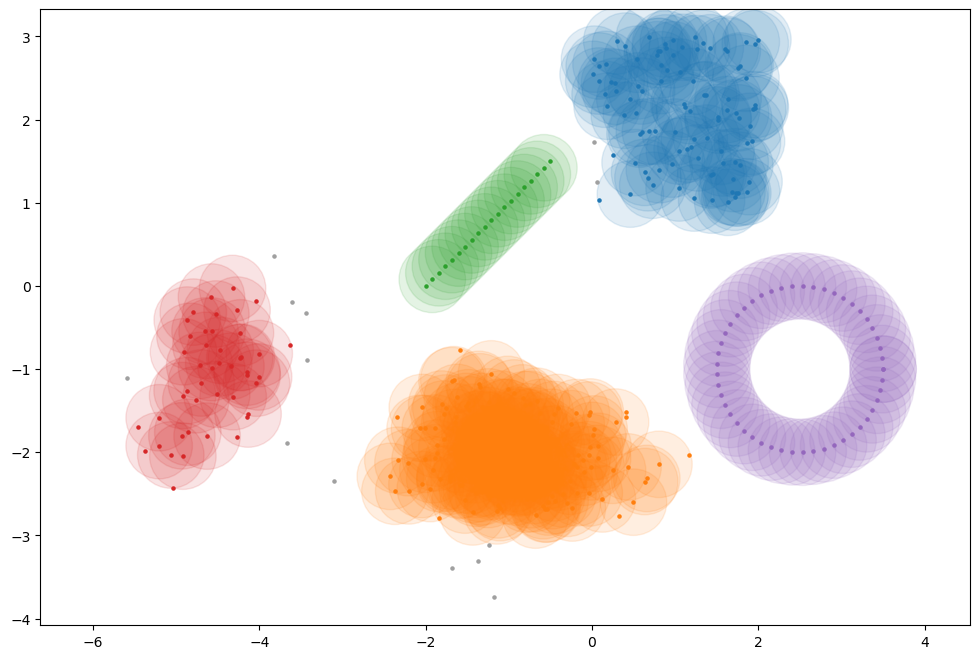

In [3]:
eps = 0.4
N = 5

dbs = cluster.DBSCAN(eps=eps, min_samples=N)
dbs.fit(X)

colors = list(mpl.colors.TABLEAU_COLORS.values())

fig, ax = plt.subplots(figsize=(12, 8))

# plot neighborhoods of core points
for i in dbs.core_sample_indices_:
    color = colors[dbs.labels_[i] % len(colors)] + '20'
    ax.add_artist(mpl.patches.Circle(X[i, :], eps, color=color))

# plot points
for label in np.unique(dbs.labels_):
    if label == -1:
        color = '#A0A0A0'
    else:
        color = colors[label % len(colors)]
    mask = dbs.labels_ == label
    ax.scatter(X[mask, 0], X[mask, 1], c=color, s=5)

ax.axis('equal')
plt.show()